In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder, OrdinalEncoder, OneHotEncoder
from sklearn.model_selection import GridSearchCV,train_test_split
#import ydata_profiling as pp
#from ydata_profiling import ProfileReport
from sklearn.metrics import f1_score,accuracy_score, classification_report,precision_recall_curve,ConfusionMatrixDisplay
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import chi2_contingency ,f_oneway
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [ ]:
#!pip install ydata_profiling

In [ ]:
df1=pd.read_excel('case_study1.xlsx')
df1.head()

,PROSPECTID,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,...,CC_TL,Consumer_TL,Gold_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,Other_TL,Age_Oldest_TL,Age_Newest_TL
0,1,5,4,1,0,0,0.000,0.0,0.200,0.800,...,0,0,1,0,4,1,4,0,72,18
1,2,1,0,1,0,0,0.000,0.0,1.000,0.000,...,0,1,0,0,0,0,1,0,7,7
2,3,8,0,8,1,0,0.125,0.0,1.000,0.000,...,0,6,1,0,0,2,6,0,47,2
3,4,1,0,1,1,0,1.000,0.0,1.000,0.000,...,0,0,0,0,0,0,1,1,5,5
4,5,3,2,1,0,0,0.000,0.0,0.333,0.667,...,0,0,0,0,0,3,0,2,131,32


In [ ]:
df2=pd.read_excel('case_study2.xlsx')
df2.head()

,PROSPECTID,time_since_recent_payment,time_since_first_deliquency,time_since_recent_deliquency,num_times_delinquent,max_delinquency_level,max_recent_level_of_deliq,num_deliq_6mts,num_deliq_12mts,num_deliq_6_12mts,...,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,max_unsec_exposure_inPct,HL_Flag,GL_Flag,last_prod_enq2,first_prod_enq2,Credit_Score,Approved_Flag
0,1,549,35,15,11,29,29,0,0,0,...,0.0,0.0,0.0,13.333,1,0,PL,PL,696,P2
1,2,47,-99999,-99999,0,-99999,0,0,0,0,...,0.0,0.0,0.0,0.860,0,0,ConsumerLoan,ConsumerLoan,685,P2
2,3,302,11,3,9,25,25,1,9,8,...,0.0,0.0,0.0,5741.667,1,0,ConsumerLoan,others,693,P2
3,4,-99999,-99999,-99999,0,-99999,0,0,0,0,...,0.0,0.0,0.0,9.900,0,0,others,others,673,P2
4,5,583,-99999,-99999,0,-99999,0,0,0,0,...,0.0,0.0,0.0,-99999.000,0,0,AL,AL,753,P1


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51336 entries, 0 to 51335
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PROSPECTID            51336 non-null  int64  
 1   Total_TL              51336 non-null  int64  
 2   Tot_Closed_TL         51336 non-null  int64  
 3   Tot_Active_TL         51336 non-null  int64  
 4   Total_TL_opened_L6M   51336 non-null  int64  
 5   Tot_TL_closed_L6M     51336 non-null  int64  
 6   pct_tl_open_L6M       51336 non-null  float64
 7   pct_tl_closed_L6M     51336 non-null  float64
 8   pct_active_tl         51336 non-null  float64
 9   pct_closed_tl         51336 non-null  float64
 10  Total_TL_opened_L12M  51336 non-null  int64  
 11  Tot_TL_closed_L12M    51336 non-null  int64  
 12  pct_tl_open_L12M      51336 non-null  float64
 13  pct_tl_closed_L12M    51336 non-null  float64
 14  Tot_Missed_Pmnt       51336 non-null  int64  
 15  Auto_TL            

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51336 entries, 0 to 51335
Data columns (total 62 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PROSPECTID                    51336 non-null  int64  
 1   time_since_recent_payment     51336 non-null  int64  
 2   time_since_first_deliquency   51336 non-null  int64  
 3   time_since_recent_deliquency  51336 non-null  int64  
 4   num_times_delinquent          51336 non-null  int64  
 5   max_delinquency_level         51336 non-null  int64  
 6   max_recent_level_of_deliq     51336 non-null  int64  
 7   num_deliq_6mts                51336 non-null  int64  
 8   num_deliq_12mts               51336 non-null  int64  
 9   num_deliq_6_12mts             51336 non-null  int64  
 10  max_deliq_6mts                51336 non-null  int64  
 11  max_deliq_12mts               51336 non-null  int64  
 12  num_times_30p_dpd             51336 non-null  int64  
 13  n

In [ ]:
df1.shape,df2.shape

((51336, 26), (51336, 62))

In [ ]:
df1.isna().sum().sum(),df2.isna().sum().sum()

(0, 0)

In [ ]:
df1.duplicated().sum(),df2.duplicated().sum()

(0, 0)

In [ ]:
df1.describe()

,PROSPECTID,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,...,CC_TL,Consumer_TL,Gold_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,Other_TL,Age_Oldest_TL,Age_Newest_TL
count,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,...,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000
mean,25668.500000,4.858598,2.770415,2.088184,0.736754,0.428919,0.184574,0.089095,0.577542,0.422458,...,0.124981,1.136084,1.561847,0.070146,0.282511,2.844904,2.013694,1.089762,-32.575639,-62.149525
std,14819.571046,7.177116,5.941680,2.290774,1.296717,0.989972,0.297414,0.205635,0.379867,0.379867,...,0.505201,2.227997,5.376434,0.340861,0.858168,6.187177,3.198322,2.417496,2791.869609,2790.818622
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-99999.000000,-99999.000000
25%,12834.750000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,4.000000
50%,25668.500000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.556000,0.444000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,33.000000,8.000000
75%,38502.250000,5.000000,3.000000,3.000000,1.000000,1.000000,0.308000,0.053000,1.000000,0.750000,...,0.000000,1.000000,1.000000,0.000000,0.000000,3.000000,2.000000,1.000000,64.000000,17.000000
max,51336.000000,235.000000,216.000000,47.000000,27.000000,19.000000,1.000000,1.000000,1.000000,1.000000,...,27.000000,41.000000,235.000000,10.000000,29.000000,235.000000,55.000000,80.000000,392.000000,392.000000


In [ ]:
df2.describe()

,PROSPECTID,time_since_recent_payment,time_since_first_deliquency,time_since_recent_deliquency,num_times_delinquent,max_delinquency_level,max_recent_level_of_deliq,num_deliq_6mts,num_deliq_12mts,num_deliq_6_12mts,...,PL_utilization,PL_Flag,pct_PL_enq_L6m_of_L12m,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,max_unsec_exposure_inPct,HL_Flag,GL_Flag,Credit_Score
count,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,...,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000
mean,25668.500000,-8129.961314,-70020.091320,-70022.375838,1.573749,-70003.987085,13.521953,0.184977,0.480053,0.295076,...,-86556.225194,0.167874,0.190414,0.065182,0.170492,0.056302,-45127.943635,0.271116,0.052887,679.859222
std,14819.571046,27749.328514,45823.312757,45819.820741,4.165012,45847.976100,53.336976,0.710240,1.522210,1.027471,...,34111.414750,0.373758,0.376218,0.235706,0.350209,0.213506,49795.784556,0.444540,0.223810,20.502764
min,1.000000,-99999.000000,-99999.000000,-99999.000000,0.000000,-99999.000000,0.000000,0.000000,0.000000,0.000000,...,-99999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-99999.000000,0.000000,0.000000,469.000000
25%,12834.750000,46.000000,-99999.000000,-99999.000000,0.000000,-99999.000000,0.000000,0.000000,0.000000,0.000000,...,-99999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-99999.000000,0.000000,0.000000,669.000000
50%,25668.500000,70.000000,-99999.000000,-99999.000000,0.000000,-99999.000000,0.000000,0.000000,0.000000,0.000000,...,-99999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333000,0.000000,0.000000,680.000000
75%,38502.250000,161.000000,8.000000,3.000000,1.000000,15.000000,10.000000,0.000000,0.000000,0.000000,...,-99999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.164250,1.000000,0.000000,691.000000
max,51336.000000,6065.000000,35.000000,35.000000,74.000000,900.000000,900.000000,12.000000,28.000000,20.000000,...,1.708000,1.000000,1.000000,1.000000,1.000000,1.000000,173800.000000,1.000000,1.000000,811.000000


<Axes: >

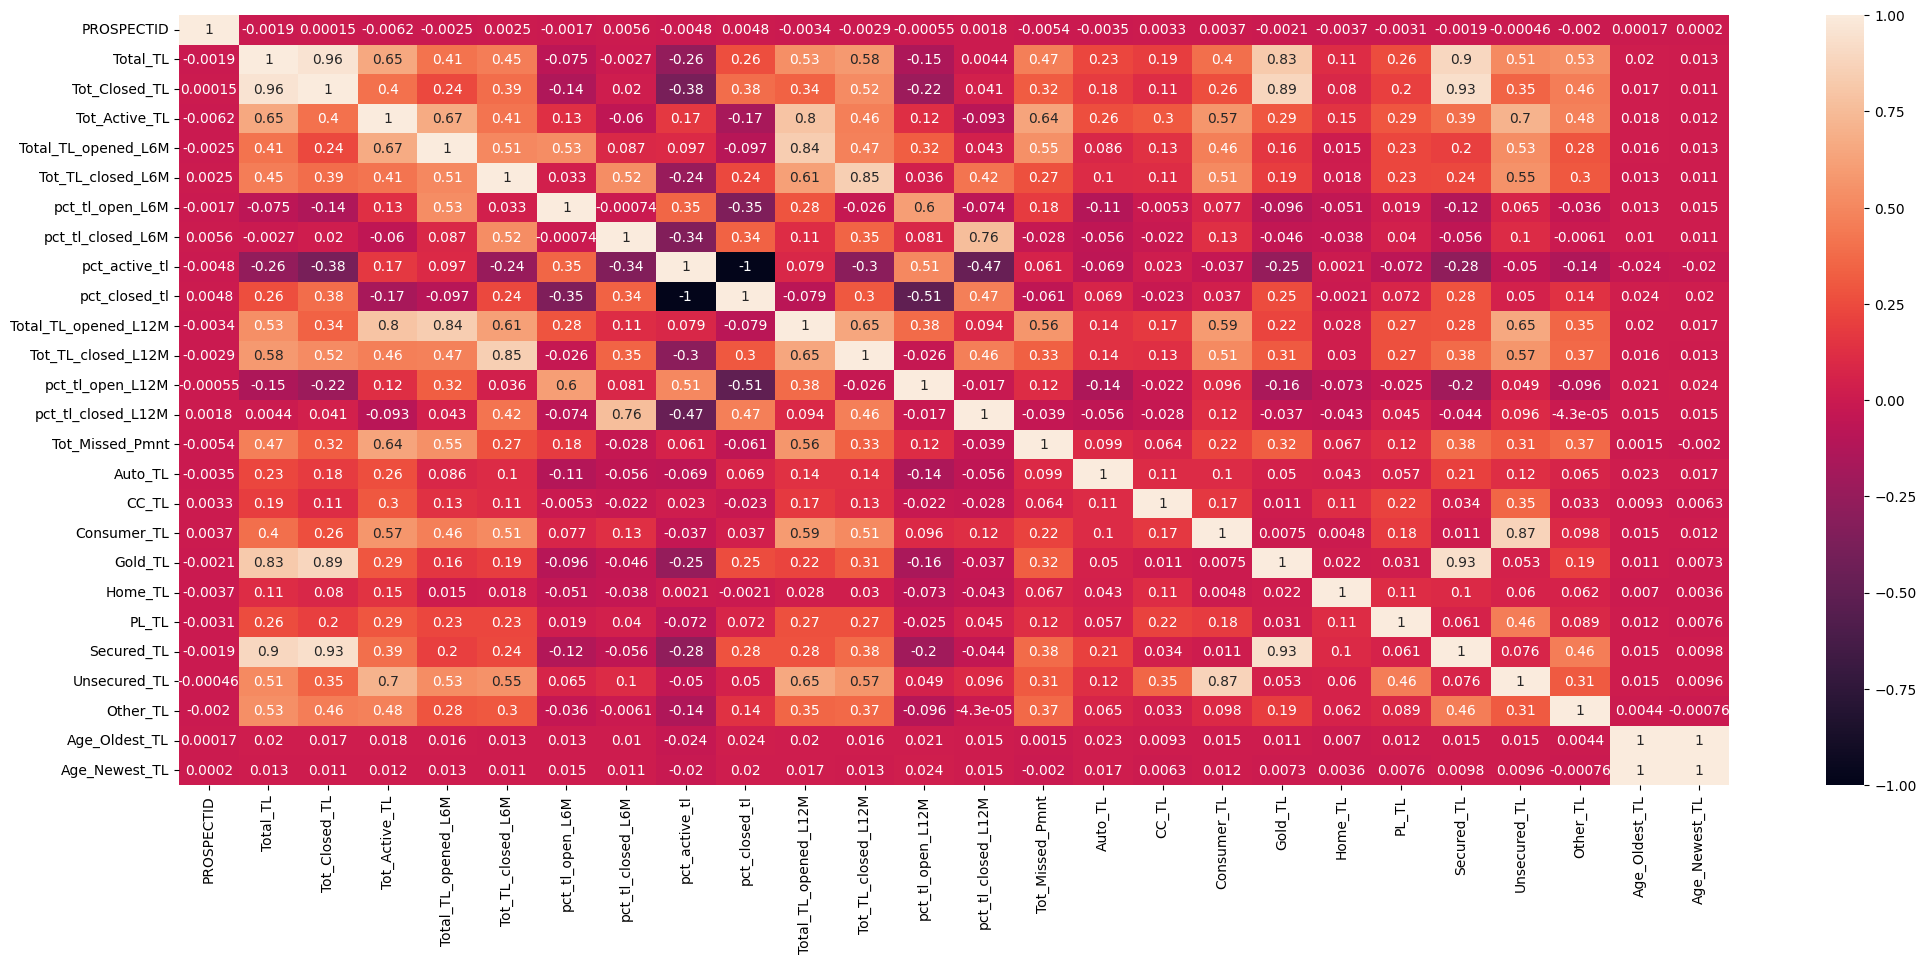

In [ ]:
df1.corr()
plt.figure(figsize=(25,10))
sns.heatmap(df1.corr(),annot=True)

In [ ]:
#understanding target col
df2['Approved_Flag'].value_counts()

,count
Approved_Flag,
P2,32199
P3,7452
P4,5882
P1,5803


<Axes: ylabel='count'>

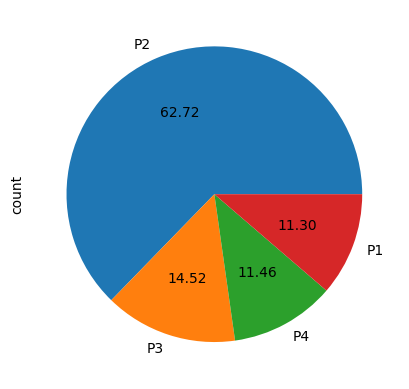

In [ ]:
(df2['Approved_Flag'].value_counts()/df1.shape[0]*100).plot(kind='pie',autopct='%.2f')

In [ ]:
DF1=df1.copy()
DF1.head(1)

,PROSPECTID,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,...,CC_TL,Consumer_TL,Gold_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,Other_TL,Age_Oldest_TL,Age_Newest_TL
0,1,5,4,1,0,0,0.0,0.0,0.2,0.8,...,0,0,1,0,4,1,4,0,72,18


In [ ]:
DF2=df2.copy()
DF2.head(1)

,PROSPECTID,time_since_recent_payment,time_since_first_deliquency,time_since_recent_deliquency,num_times_delinquent,max_delinquency_level,max_recent_level_of_deliq,num_deliq_6mts,num_deliq_12mts,num_deliq_6_12mts,...,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,max_unsec_exposure_inPct,HL_Flag,GL_Flag,last_prod_enq2,first_prod_enq2,Credit_Score,Approved_Flag
0,1,549,35,15,11,29,29,0,0,0,...,0.0,0.0,0.0,13.333,1,0,PL,PL,696,P2


In [ ]:
#remove missing/null value which is filled by static value

# Function for Identifying the columns that have null values more than 10000
all_columns = DF2.columns
def get_column_names_with_max_null_values():
    column_with_max_null_values = []
    for column in all_columns:
        series_null = (DF2[column]==-99999)
        if series_null.sum() >=10000:
            column_with_max_null_values.append(column)

    return column_with_max_null_values

In [ ]:
column_with_max_null_values= get_column_names_with_max_null_values()
print("List of columns that have 10000 & more null_values >>>\n\n",column_with_max_null_values)
print()
print("Number of columns that have 10000 & more null_values >>>\n", len(column_with_max_null_values))

List of columns that have 10000 & more null_values >>>

 ['time_since_first_deliquency', 'time_since_recent_deliquency', 'max_delinquency_level', 'max_deliq_6mts', 'max_deliq_12mts', 'CC_utilization', 'PL_utilization', 'max_unsec_exposure_inPct']

Number of columns that have 10000 & more null_values >>>
 8


In [ ]:
#deleling the records which has null val
DF1 = DF1.loc[DF1['Age_Oldest_TL'] != -99999]

In [ ]:
#deleling the col which has null val
DF2=DF2.drop(column_with_max_null_values,axis=1)

In [ ]:
DF2.shape,DF1.shape

((51336, 54), (51296, 26))

In [ ]:
#deleling the records which has null val
for i in DF2.columns:
    DF2 = DF2.loc[ DF2[i] != -99999 ]

In [ ]:
DF2.shape,DF1.shape

((42066, 54), (51296, 26))

In [ ]:
#Identifying the columns that have single unique values
all_columns = DF2.columns
def get_columns_with_single_unique_values():
    columns_with_one_value = []
    for column in all_columns:
        series_length = len(DF2[column].value_counts())
        if series_length == 1:
            columns_with_one_value.append(column)

    return columns_with_one_value

In [ ]:
columns_with_single_unique_values = get_columns_with_single_unique_values()
print("Column that have single unique value >>>", columns_with_single_unique_values)

Column that have single unique value >>> []


In [ ]:
# Checking common column names
for i in list(DF1.columns):
    if i in list(DF2.columns):
        print (i)

PROSPECTID


In [ ]:
# Merge the two dataframes, inner join so that no nulls are present
df = pd. merge ( DF1, DF2, how ='inner', left_on = ['PROSPECTID'], right_on = ['PROSPECTID'] )

In [ ]:
df.sample(5)

,PROSPECTID,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,...,pct_PL_enq_L6m_of_L12m,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,HL_Flag,GL_Flag,last_prod_enq2,first_prod_enq2,Credit_Score,Approved_Flag
3490,4207,7,4,3,2,0,0.286,0.0,0.429,0.571,...,0.0,0.0,0.0,0.0,1,0,HL,HL,702,P3
11128,13519,11,8,3,2,0,0.182,0.0,0.273,0.727,...,1.0,1.0,1.0,1.0,1,0,ConsumerLoan,AL,666,P3
29398,35880,3,0,3,2,0,0.667,0.0,1.000,0.000,...,1.0,0.0,1.0,0.0,0,0,PL,others,670,P2
29408,35892,2,1,1,1,0,0.500,0.0,0.500,0.500,...,1.0,0.0,1.0,0.0,0,0,PL,others,686,P2
11036,13396,1,0,1,1,0,1.000,0.0,1.000,0.000,...,0.0,0.0,0.0,0.0,0,0,ConsumerLoan,others,671,P2


In [ ]:
df.shape

(42064, 79)

In [ ]:
# check how many columns are categorical
df_category=[]
for i in df.columns:
    if df[i].dtype == 'object':
        print(i)
        df_category.append(i)

MARITALSTATUS
EDUCATION
GENDER
last_prod_enq2
first_prod_enq2
Approved_Flag


In [ ]:
df_category

['MARITALSTATUS',
 'EDUCATION',
 'GENDER',
 'last_prod_enq2',
 'first_prod_enq2',
 'Approved_Flag']

In [ ]:
#Univariate analysis for col MARITALSTATUS
df['MARITALSTATUS'].value_counts()

,count
MARITALSTATUS,
Married,30886
Single,11178


<Axes: xlabel='count', ylabel='MARITALSTATUS'>

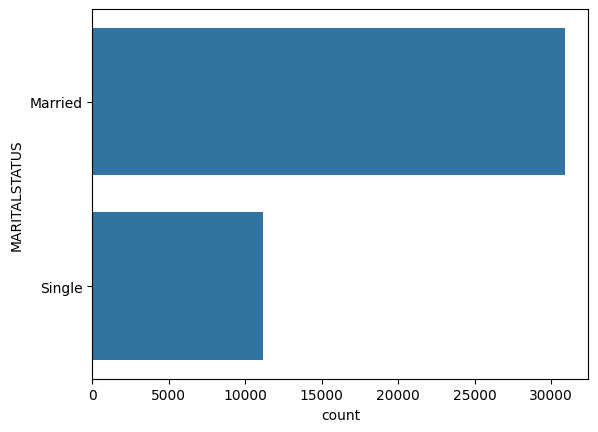

In [ ]:
sns.countplot(df['MARITALSTATUS'])

<Axes: ylabel='count'>

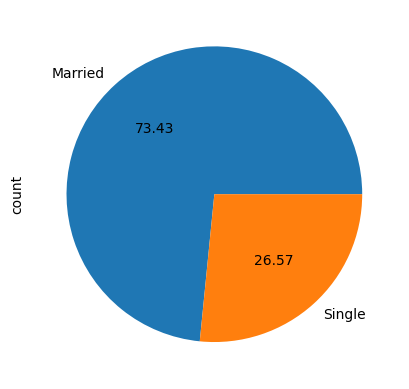

In [ ]:
df['MARITALSTATUS'].value_counts().plot(kind='pie',autopct='%.2f')

In [ ]:
#Univariate analysis for col EDUCATION
df['EDUCATION'].value_counts()

,count
EDUCATION,
GRADUATE,14140
12TH,11703
SSC,7241
UNDER GRADUATE,4572
OTHERS,2291
POST-GRADUATE,1898
PROFESSIONAL,219


<Axes: xlabel='count', ylabel='EDUCATION'>

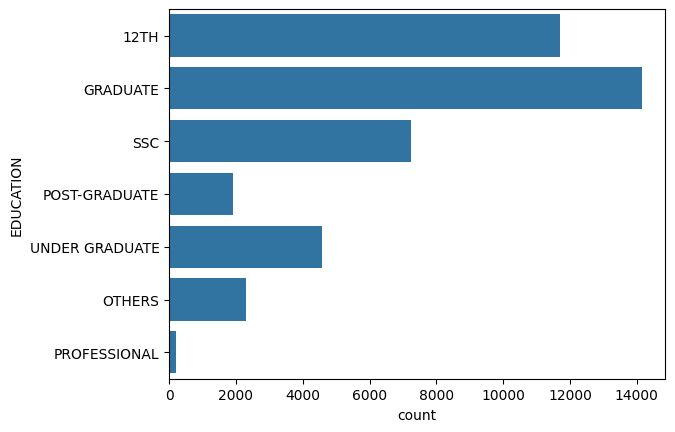

In [ ]:
sns.countplot(df['EDUCATION'])

<Axes: ylabel='count'>

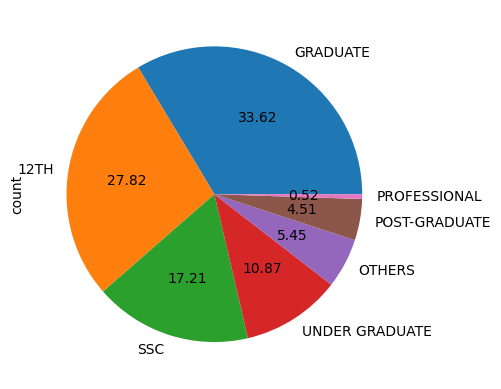

In [ ]:
df['EDUCATION'].value_counts().plot(kind='pie',autopct='%.2f')

In [ ]:
#Univariate analysis for col Gender
df['GENDER'].value_counts()

,count
GENDER,
M,37345
F,4719


<Axes: xlabel='count', ylabel='GENDER'>

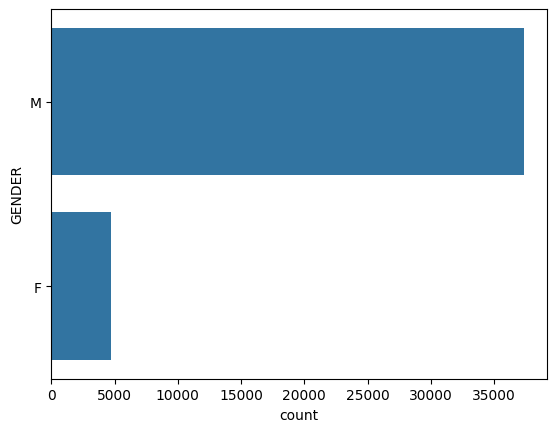

In [ ]:
sns.countplot(df['GENDER'])

<Axes: ylabel='count'>

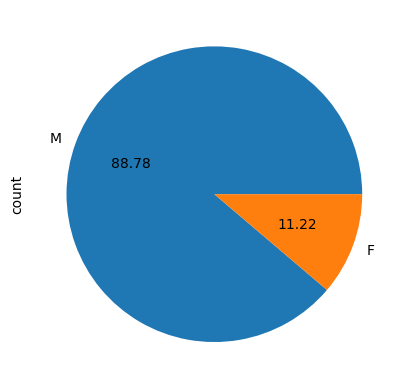

In [ ]:
df['GENDER'].value_counts().plot(kind='pie',autopct='%.2f')

In [ ]:
#Univariate analysis for col last_prod_enq2(last product enquiry)
df['last_prod_enq2'].value_counts()

,count
last_prod_enq2,
ConsumerLoan,16480
others,13653
PL,7553
CC,2195
AL,1353
HL,830


<Axes: xlabel='count', ylabel='last_prod_enq2'>

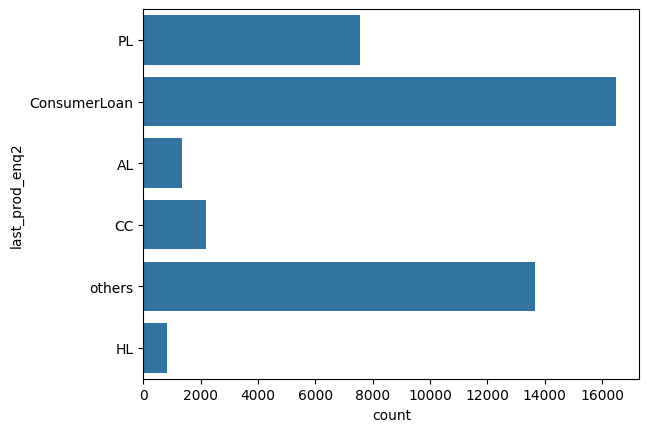

In [ ]:
sns.countplot(df['last_prod_enq2'])

<Axes: ylabel='count'>

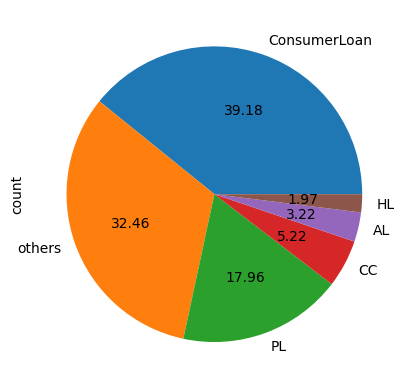

In [ ]:
df['last_prod_enq2'].value_counts().plot(kind='pie',autopct='%.2f')

In [ ]:
#Univariate analysis for col first_prod_enq2(first product enquiry)
df['first_prod_enq2'].value_counts()

,count
first_prod_enq2,
others,20640
ConsumerLoan,11075
PL,4431
AL,2641
CC,1988
HL,1289


<Axes: xlabel='count', ylabel='first_prod_enq2'>

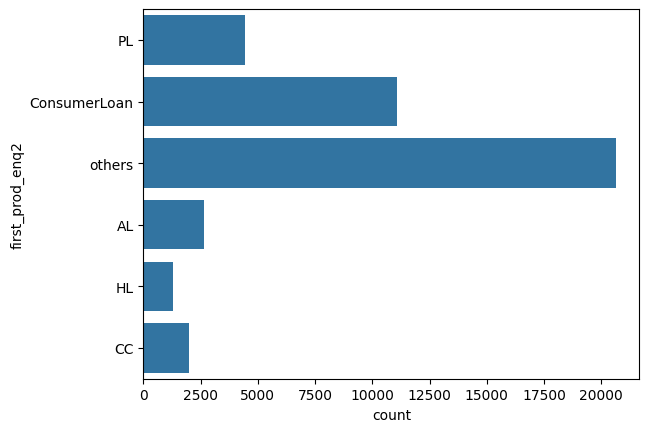

In [ ]:
sns.countplot(df['first_prod_enq2'])

<Axes: ylabel='count'>

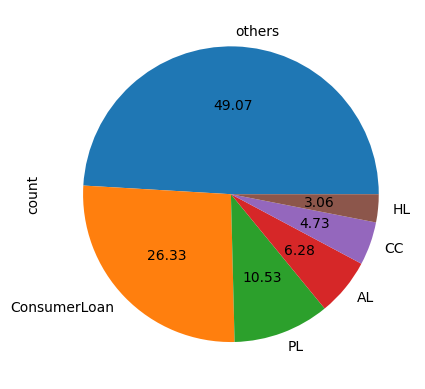

In [ ]:
df['first_prod_enq2'].value_counts().plot(kind='pie',autopct='%.2f')

In [ ]:
for i in df.columns:
    if df[i].dtype == 'object':
        # Chi-square test for categorical variables against 'Approved_Flag'
        chi2,p_val,_,_=chi2_contingency(pd.crosstab(df[i],df['Approved_Flag']))
        print(i,'---',p_val)

MARITALSTATUS --- 3.578180861038862e-233
EDUCATION --- 2.6942265249737532e-30
GENDER --- 1.907936100186563e-05
last_prod_enq2 --- 0.0
first_prod_enq2 --- 7.84997610555419e-287
Approved_Flag --- 0.0


In [ ]:
# Since all the categorical features have pval <=0.05, we will accept all

<Axes: xlabel='Approved_Flag', ylabel='MARITALSTATUS'>

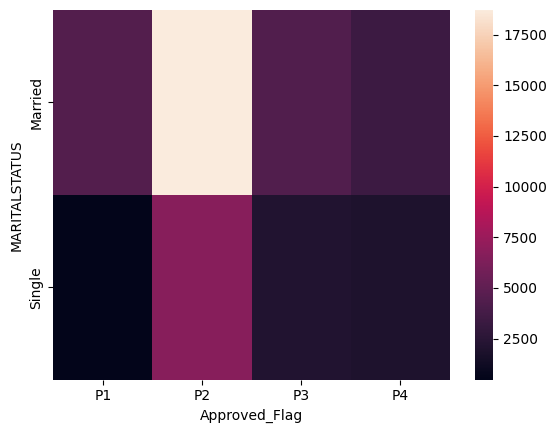

In [ ]:
#biavarite analysis of categarical col with target
sns.heatmap(pd.crosstab(df['MARITALSTATUS'],df['Approved_Flag']))

In [ ]:
# # The heatmap displays the cross-tabulation of 'MARITALSTATUS' and 'Approved_Flag'.
# It shows the count of individuals in each combination of marital status and approval flag.
# Darker shades indicate higher counts, while lighter shades indicate lower counts.
# For example, a dark shade in the intersection of 'Married' and 'Approved' indicates a higher number of married individuals who got their application approved.
# By analyzing the heatmap, we can understand the relationship between marital status and loan approval.
# It can help us identify if there is any significant association between the two variables.

<Axes: xlabel='Approved_Flag', ylabel='EDUCATION'>

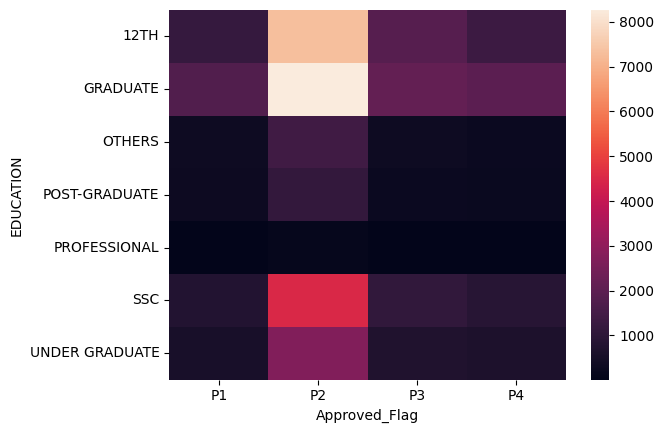

In [ ]:
sns.heatmap(pd.crosstab(df['EDUCATION'],df['Approved_Flag']))

In [ ]:
# The heatmap displays the cross-tabulation of 'EDUCATION' and 'Approved_Flag'.
# It shows the count of individuals in each combination of education level and approval flag.
# Darker shades indicate higher counts, while lighter shades indicate lower counts.
# For example, a dark shade in the intersection of 'Graduate' and 'Approved' indicates a higher number of graduate individuals who got their application approved.
# By analyzing the heatmap, we can understand the relationship between education level and loan approval.
# It can help us identify if there is any significant association between the two variables.


<Axes: xlabel='Approved_Flag', ylabel='GENDER'>

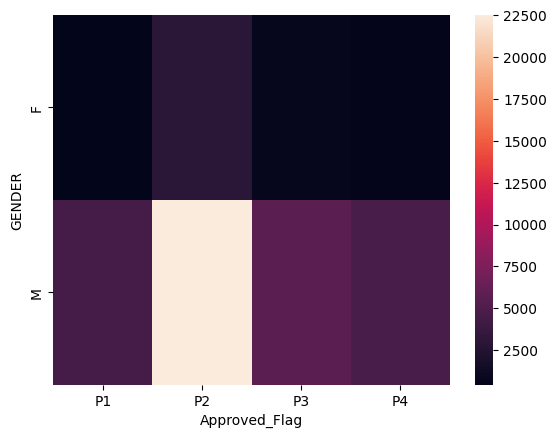

In [ ]:
sns.heatmap(pd.crosstab(df['GENDER'],df['Approved_Flag']))

In [ ]:
# The heatmap displays the cross-tabulation of 'GENDER' and 'Approved_Flag'.
# It shows the count of individuals in each combination of gender and approval flag.
# Darker shades indicate higher counts, while lighter shades indicate lower counts.
# For example, a dark shade in the intersection of 'Male' and 'Approved' indicates a higher number of male individuals who got their application approved.
# By analyzing the heatmap, we can understand the relationship between gender and loan approval.
# It can help us identify if there is any significant association between the two variables.

<Axes: xlabel='Approved_Flag', ylabel='last_prod_enq2'>

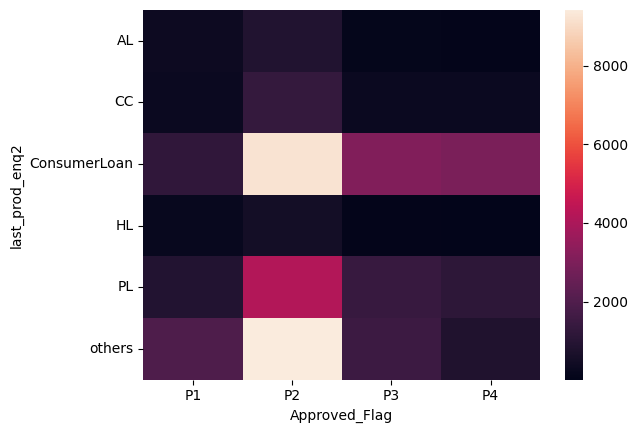

In [ ]:
sns.heatmap(pd.crosstab(df['last_prod_enq2'],df['Approved_Flag']))

In [ ]:
# The heatmap displays the cross-tabulation of 'last_prod_enq2' and 'Approved_Flag'.
# It shows the count of individuals in each combination of last product enquiry and approval flag.
# Darker shades indicate higher counts, while lighter shades indicate lower counts.
# For example, a dark shade in the intersection of a specific 'last_prod_enq2' value and 'Approved' indicates a higher number of individuals
# with that specific last product enquiry who got their application approved.
# By analyzing the heatmap, we can understand the relationship between last product enquiry and loan approval.
# It can help us identify if there is any significant association between the two variables.
# For instance, if we see a darker shade for a specific 'last_prod_enq2' value in the 'Approved' column, it suggests that individuals
# with that particular last product enquiry are more likely to get their loan approved.
# Conversely, if we see a lighter shade for a specific 'last_prod_enq2' value in the 'Approved' column, it suggests that individuals
# with that particular last product enquiry are less likely to get their loan approved.

<Axes: xlabel='Approved_Flag', ylabel='first_prod_enq2'>

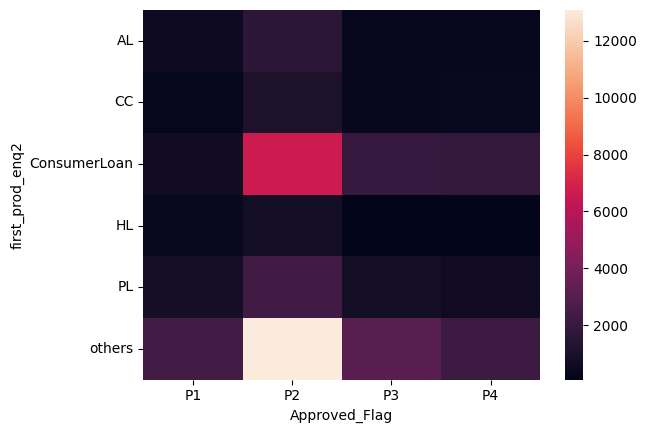

In [ ]:
sns.heatmap(pd.crosstab(df['first_prod_enq2'],df['Approved_Flag']))

In [ ]:
# The heatmap displays the cross-tabulation of 'first_prod_enq2' and 'Approved_Flag'.
# It shows the count of individuals in each combination of first product enquiry and approval flag.
# Darker shades indicate higher counts, while lighter shades indicate lower counts.
# For example, a dark shade in the intersection of a specific 'first_prod_enq2' value and 'Approved' indicates a higher number of individuals
# with that specific first product enquiry who got their application approved.
# By analyzing the heatmap, we can understand the relationship between first product enquiry and loan approval.
# It can help us identify if there is any significant association between the two variables.
# For instance, if we see a darker shade for a specific 'first_prod_enq2' value in the 'Approved' column, it suggests that individuals
# with that particular first product enquiry are more likely to get their loan approved.
# Conversely, if we see a lighter shade for a specific 'first_prod_enq2' value in the 'Approved' column, it suggests that individuals
# with that particular first product enquiry are less likely to get their loan approved.

In [ ]:
#fetch numerical columns
df_numerical = []
for i in df.columns:
    if df[i].dtype != 'object' and i not in ['PROSPECTID','Approved_Flag']:
        df_numerical.append(i)

In [ ]:
print(df_numerical),len(df_numerical)

['Total_TL', 'Tot_Closed_TL', 'Tot_Active_TL', 'Total_TL_opened_L6M', 'Tot_TL_closed_L6M', 'pct_tl_open_L6M', 'pct_tl_closed_L6M', 'pct_active_tl', 'pct_closed_tl', 'Total_TL_opened_L12M', 'Tot_TL_closed_L12M', 'pct_tl_open_L12M', 'pct_tl_closed_L12M', 'Tot_Missed_Pmnt', 'Auto_TL', 'CC_TL', 'Consumer_TL', 'Gold_TL', 'Home_TL', 'PL_TL', 'Secured_TL', 'Unsecured_TL', 'Other_TL', 'Age_Oldest_TL', 'Age_Newest_TL', 'time_since_recent_payment', 'num_times_delinquent', 'max_recent_level_of_deliq', 'num_deliq_6mts', 'num_deliq_12mts', 'num_deliq_6_12mts', 'num_times_30p_dpd', 'num_times_60p_dpd', 'num_std', 'num_std_6mts', 'num_std_12mts', 'num_sub', 'num_sub_6mts', 'num_sub_12mts', 'num_dbt', 'num_dbt_6mts', 'num_dbt_12mts', 'num_lss', 'num_lss_6mts', 'num_lss_12mts', 'recent_level_of_deliq', 'tot_enq', 'CC_enq', 'CC_enq_L6m', 'CC_enq_L12m', 'PL_enq', 'PL_enq_L6m', 'PL_enq_L12m', 'time_since_recent_enq', 'enq_L12m', 'enq_L6m', 'enq_L3m', 'AGE', 'NETMONTHLYINCOME', 'Time_With_Curr_Empr', 'pct_

(None, 72)

In [ ]:
vif_df = df[df_numerical]
vif_df.shape

(42064, 72)

In [ ]:
vif_df.sample()

,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,Total_TL_opened_L12M,...,pct_currentBal_all_TL,CC_Flag,PL_Flag,pct_PL_enq_L6m_of_L12m,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,HL_Flag,GL_Flag,Credit_Score
3274,12,7,5,1,2,0.083,0.167,0.417,0.583,1,...,0.541,1,0,0.0,0.0,0.0,0.0,1,0,681


In [ ]:
vif_list=[]
for i in range(vif_df.shape[1]):
    vif=variance_inflation_factor(vif_df.to_numpy(),i)
    vif_list.append(vif)
vif_list #it will give the list of vifs
#to disply it with col names we add this to series
s1=pd.Series(vif_list,index=vif_df.columns)
s1

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,0
Total_TL,inf
Tot_Closed_TL,inf
Tot_Active_TL,inf
Total_TL_opened_L6M,8.386094
Tot_TL_closed_L6M,6.822916
...,...
pct_PL_enq_L6m_of_ever,18.107746
pct_CC_enq_L6m_of_ever,15.980815
HL_Flag,1.791188
GL_Flag,4.103818


<Axes: >

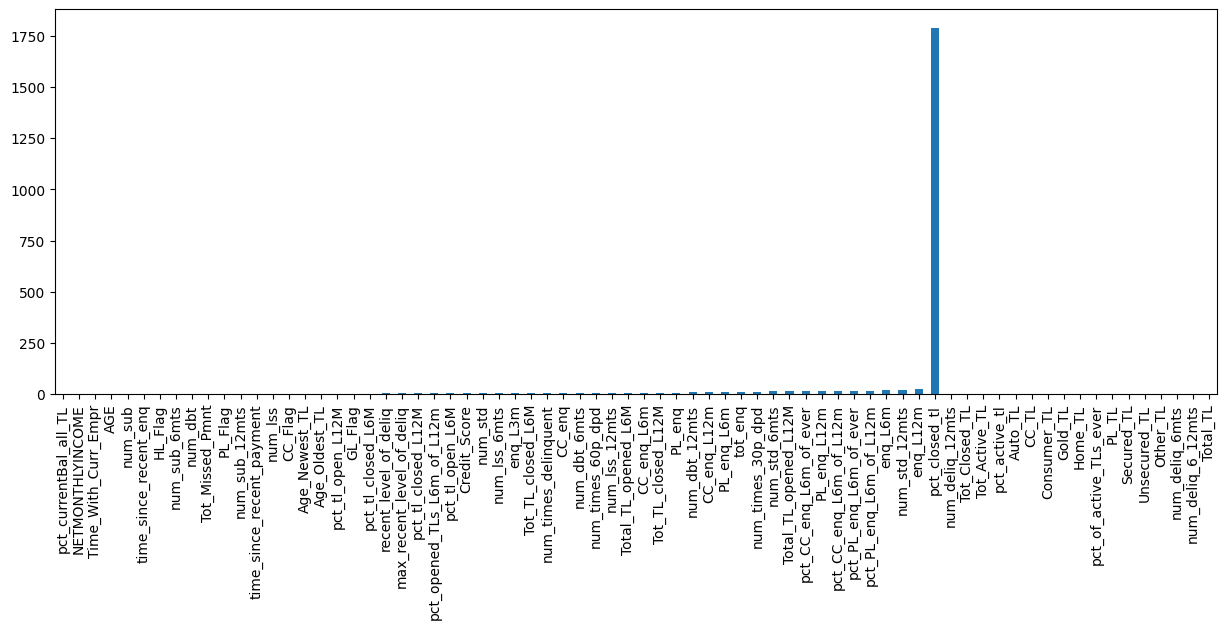

In [ ]:
plt.figure(figsize=(15,5))
s1.sort_values().plot(kind='bar')

In [ ]:
#removing col which has high multicolinearity ie inf
vif_df1=vif_df.drop( s1[s1 == np.inf].index.tolist(), axis=1)

In [ ]:
vif_df1.shape

(42064, 55)

In [ ]:
vif_list=[]
for i in range(vif_df1.shape[1]):
    vif=variance_inflation_factor(vif_df1.to_numpy(),i)
    vif_list.append(vif)
vif_list #it will give the list of vifs
#to disply it with col names we add this to series
s1=pd.Series(vif_list,index=vif_df1.columns)
s1

,0
Total_TL_opened_L6M,11.167654
Tot_TL_closed_L6M,7.987256
pct_tl_open_L6M,7.508443
pct_tl_closed_L6M,5.080248
pct_closed_tl,6.922126
Total_TL_opened_L12M,15.165728
Tot_TL_closed_L12M,9.864085
pct_tl_open_L12M,7.513258
pct_tl_closed_L12M,6.232870
Tot_Missed_Pmnt,2.399680


In [ ]:
s1.sort_values(ascending=False)

,0
enq_L12m,36.349637
enq_L6m,30.668712
Credit_Score,29.853800
num_std_12mts,25.799963
pct_PL_enq_L6m_of_L12m,24.029181
pct_PL_enq_L6m_of_ever,23.156988
AGE,22.148585
pct_CC_enq_L6m_of_L12m,19.121901
PL_enq_L12m,19.084373
pct_CC_enq_L6m_of_ever,17.220151


<Axes: >

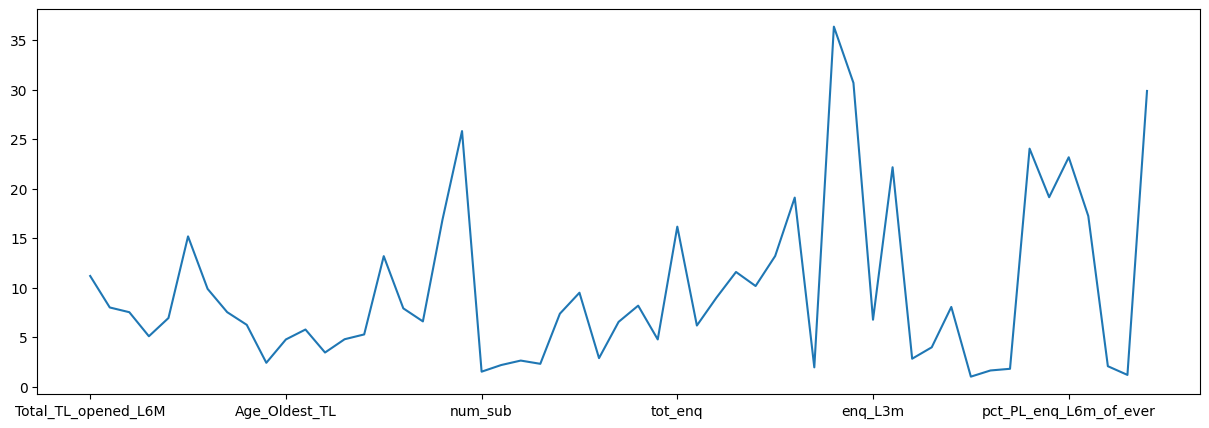

In [ ]:
plt.figure(figsize=(15,5))
s1.plot()

<Axes: >

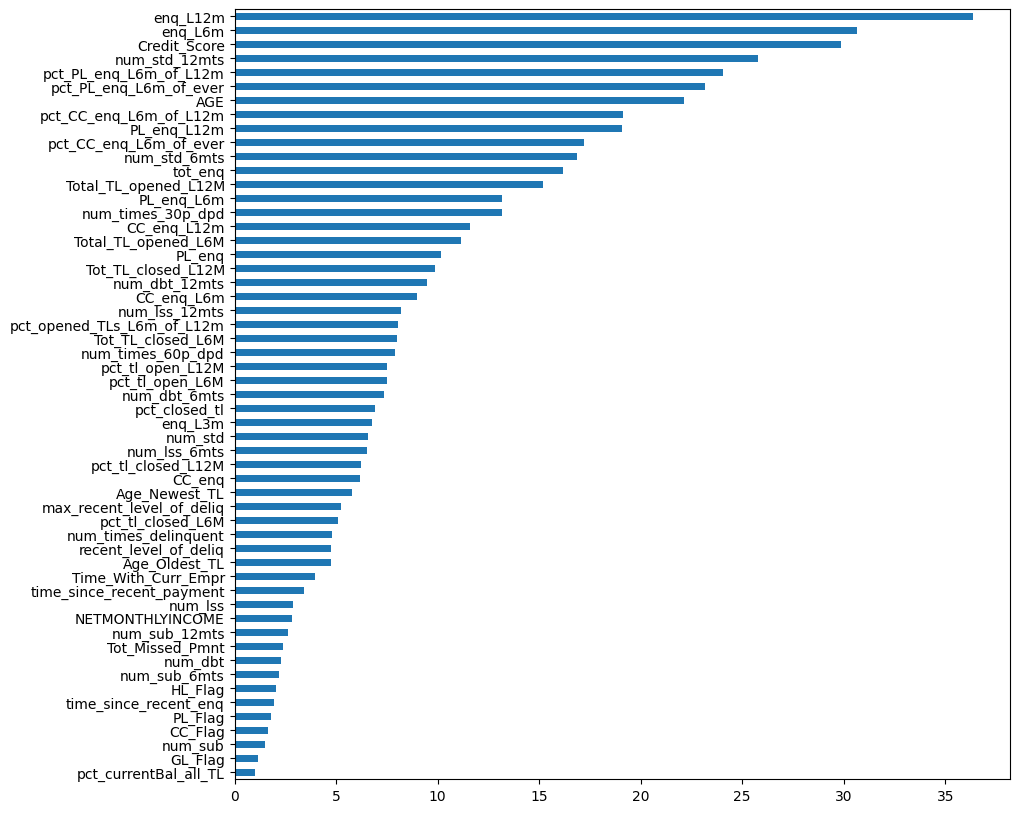

In [ ]:
#if we want horizontal bar then
plt.figure(figsize=(10,10))
s1.sort_values().plot(kind='barh')

In [ ]:
#vif_df1=vif_df1.drop('enq_L12m',axis=1)
vif_df1.shape

(42064, 55)

In [ ]:
vif_list=[]
for i in range(vif_df1.shape[1]):
    vif=variance_inflation_factor(vif_df1.to_numpy(),i)
    vif_list.append(vif)
vif_list #it will give the list of vifs
#to disply it with col names we add this to series
s1=pd.Series(vif_list,index=vif_df1.columns)
s1.sort_values(ascending=False)

,0
enq_L12m,36.349637
enq_L6m,30.668712
Credit_Score,29.853800
num_std_12mts,25.799963
pct_PL_enq_L6m_of_L12m,24.029181
pct_PL_enq_L6m_of_ever,23.156988
AGE,22.148585
pct_CC_enq_L6m_of_L12m,19.121901
PL_enq_L12m,19.084373
pct_CC_enq_L6m_of_ever,17.220151


In [ ]:
vif_df1=vif_df1.drop('Credit_Score',axis=1)
vif_df1.shape

(42064, 54)

In [ ]:
vif_list=[]
for i in range(vif_df1.shape[1]):
    vif=variance_inflation_factor(vif_df1.to_numpy(),i)
    vif_list.append(vif)
vif_list #it will give the list of vifs
#to disply it with col names we add this to series
s1=pd.Series(vif_list,index=vif_df1.columns)
s1.sort_values(ascending=False)

,0
enq_L12m,36.268713
enq_L6m,30.666032
num_std_12mts,25.749437
pct_PL_enq_L6m_of_L12m,24.028114
pct_PL_enq_L6m_of_ever,23.127683
pct_CC_enq_L6m_of_L12m,19.120390
PL_enq_L12m,19.016959
pct_CC_enq_L6m_of_ever,17.220010
num_std_6mts,16.840136
tot_enq,15.862551


In [ ]:
vif_df1=vif_df1.drop(['num_std_12mts','pct_PL_enq_L6m_of_L12m'],axis=1)
vif_df1.shape

(42064, 52)

In [ ]:
vif_list=[]
for i in range(vif_df1.shape[1]):
    vif=variance_inflation_factor(vif_df1.to_numpy(),i)
    vif_list.append(vif)
vif_list #it will give the list of vifs
#to disply it with col names we add this to series
s1=pd.Series(vif_list,index=vif_df1.columns)
s1.sort_values(ascending=False)

,0
enq_L12m,36.258868
enq_L6m,30.647110
pct_CC_enq_L6m_of_L12m,19.095789
PL_enq_L12m,17.659762
pct_CC_enq_L6m_of_ever,17.202239
tot_enq,15.837416
Total_TL_opened_L12M,15.157200
num_times_30p_dpd,13.166247
PL_enq_L6m,12.885327
AGE,12.259890


In [ ]:
vif_df1=vif_df1.drop(['pct_CC_enq_L6m_of_L12m','pct_CC_enq_L6m_of_ever','enq_L6m'],axis=1)
vif_df1.shape

(42064, 49)

In [ ]:
vif_list=[]
for i in range(vif_df1.shape[1]):
    vif=variance_inflation_factor(vif_df1.to_numpy(),i)
    vif_list.append(vif)
vif_list #it will give the list of vifs
#to disply it with col names we add this to series
s1=pd.Series(vif_list,index=vif_df1.columns)
s1.sort_values(ascending=False)

,0
enq_L12m,19.389835
tot_enq,15.772358
PL_enq_L12m,15.516998
Total_TL_opened_L12M,14.939882
num_times_30p_dpd,13.165748
AGE,12.257160
Total_TL_opened_L6M,10.870685
Tot_TL_closed_L12M,9.792742
CC_enq_L12m,9.749414
PL_enq_L6m,9.688161


In [ ]:
vif_df1=vif_df1.drop(['Total_TL_opened_L12M','num_times_30p_dpd'],axis=1)
vif_df1.shape

(42064, 47)

In [ ]:
vif_list=[]
for i in range(vif_df1.shape[1]):
    vif=variance_inflation_factor(vif_df1.to_numpy(),i)
    vif_list.append(vif)
vif_list #it will give the list of vifs
#to disply it with col names we add this to series
s1=pd.Series(vif_list,index=vif_df1.columns)
s1.sort_values(ascending=False)

,0
enq_L12m,19.253912
tot_enq,15.688255
PL_enq_L12m,15.488806
AGE,12.256109
CC_enq_L12m,9.738382
PL_enq_L6m,9.609819
num_dbt_12mts,9.476172
PL_enq,9.058573
Tot_TL_closed_L12M,8.351354
num_lss_12mts,8.168882


In [ ]:
vif_df1=vif_df1.drop(['AGE','PL_enq_L12m'],axis=1)
vif_df1.shape

(42064, 45)

In [ ]:
vif_list=[]
for i in range(vif_df1.shape[1]):
    vif=variance_inflation_factor(vif_df1.to_numpy(),i)
    vif_list.append(vif)
vif_list #it will give the list of vifs
#to disply it with col names we add this to series
s1=pd.Series(vif_list,index=vif_df1.columns)
s1.sort_values(ascending=False)

,0
enq_L12m,14.950483
tot_enq,13.847382
CC_enq_L12m,9.726075
num_dbt_12mts,9.476081
Tot_TL_closed_L12M,8.323223
num_lss_12mts,8.168657
Tot_TL_closed_L6M,7.934426
num_dbt_6mts,7.358292
pct_tl_open_L6M,7.177627
pct_opened_TLs_L6m_of_L12m,6.983286


<Axes: >

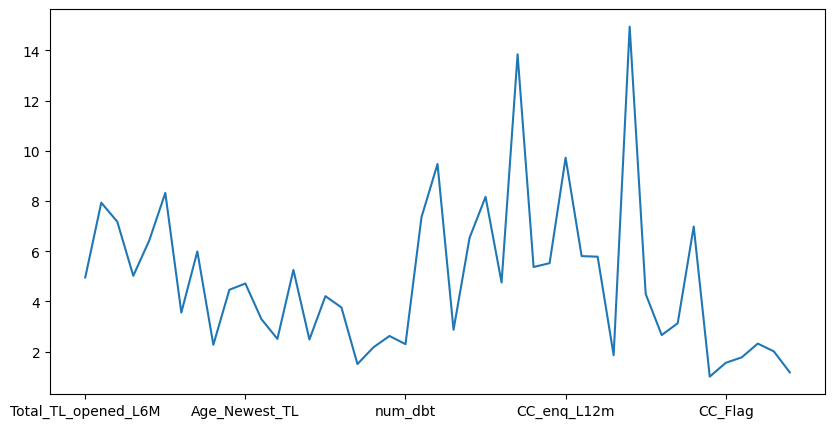

In [ ]:
#now vif<10 so we will kept these col
plt.figure(figsize=(10,5))
s1.plot()

<Axes: >

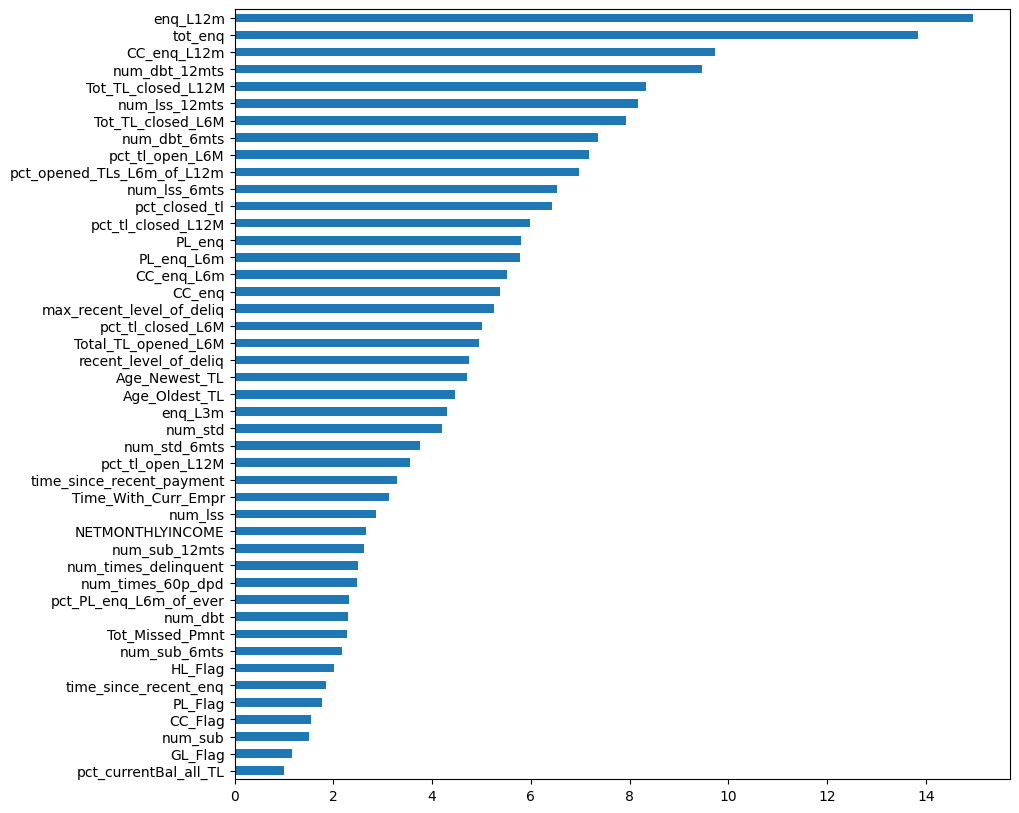

In [ ]:
plt.figure(figsize=(10,10))
s1.sort_values().plot(kind='barh')

In [ ]:
# check Anova for columns_to_be_kept

columns_to_be_kept_numerical = []

for i in vif_df1:
    a = list(df[i])
    b = list(df['Approved_Flag'])

    group_P1 = [value for value, group in zip(a, b) if group == 'P1']
    group_P2 = [value for value, group in zip(a, b) if group == 'P2']
    group_P3 = [value for value, group in zip(a, b) if group == 'P3']
    group_P4 = [value for value, group in zip(a, b) if group == 'P4']


    f_statistic, p_value = f_oneway(group_P1, group_P2, group_P3, group_P4)

    if p_value <= 0.05:
        columns_to_be_kept_numerical.append(i)

In [ ]:
#3 col dropped
print(columns_to_be_kept_numerical),len(columns_to_be_kept_numerical)

['Total_TL_opened_L6M', 'Tot_TL_closed_L6M', 'pct_tl_open_L6M', 'pct_tl_closed_L6M', 'pct_closed_tl', 'Tot_TL_closed_L12M', 'pct_tl_open_L12M', 'pct_tl_closed_L12M', 'Tot_Missed_Pmnt', 'Age_Oldest_TL', 'Age_Newest_TL', 'time_since_recent_payment', 'num_times_delinquent', 'max_recent_level_of_deliq', 'num_times_60p_dpd', 'num_std', 'num_std_6mts', 'num_sub', 'num_sub_6mts', 'num_sub_12mts', 'num_dbt', 'num_dbt_6mts', 'num_dbt_12mts', 'num_lss', 'recent_level_of_deliq', 'tot_enq', 'CC_enq', 'CC_enq_L6m', 'CC_enq_L12m', 'PL_enq', 'PL_enq_L6m', 'time_since_recent_enq', 'enq_L12m', 'enq_L3m', 'NETMONTHLYINCOME', 'Time_With_Curr_Empr', 'pct_opened_TLs_L6m_of_L12m', 'CC_Flag', 'PL_Flag', 'pct_PL_enq_L6m_of_ever', 'HL_Flag', 'GL_Flag']


(None, 42)

In [ ]:
# listing all the final features
features = columns_to_be_kept_numerical + df_category
df = df[features]

In [ ]:
df.head()

,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_closed_tl,Tot_TL_closed_L12M,pct_tl_open_L12M,pct_tl_closed_L12M,Tot_Missed_Pmnt,Age_Oldest_TL,...,PL_Flag,pct_PL_enq_L6m_of_ever,HL_Flag,GL_Flag,MARITALSTATUS,EDUCATION,GENDER,last_prod_enq2,first_prod_enq2,Approved_Flag
0,0,0,0.000,0.0,0.800,0,0.00,0.000,0,72,...,1,0.000,1,0,Married,12TH,M,PL,PL,P2
1,0,0,0.000,0.0,0.000,0,1.00,0.000,0,7,...,0,0.000,0,0,Single,GRADUATE,F,ConsumerLoan,ConsumerLoan,P2
2,1,0,0.125,0.0,0.000,0,0.25,0.000,1,47,...,0,0.000,1,0,Married,SSC,M,ConsumerLoan,others,P2
3,0,0,0.000,0.0,0.667,0,0.00,0.000,0,131,...,0,0.000,0,0,Married,POST-GRADUATE,M,AL,AL,P1
4,0,0,0.000,0.0,0.833,1,0.00,0.167,0,150,...,0,0.429,1,0,Married,12TH,M,ConsumerLoan,PL,P3


In [ ]:
df.shape

(42064, 48)

In [ ]:
df['Total_TL_opened_L6M'].skew()

3.2327428916830923

In [ ]:
df['Approved_Flag'].value_counts()

,count
Approved_Flag,
P2,25452
P3,6440
P4,5264
P1,4908


In [ ]:
#prof = ProfileReport(df)
#prof.to_file(output_file='output.html')

In [ ]:
df.duplicated().sum()

2

In [ ]:
df=df.drop_duplicates()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42062 entries, 0 to 42063
Data columns (total 48 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Total_TL_opened_L6M         42062 non-null  int64  
 1   Tot_TL_closed_L6M           42062 non-null  int64  
 2   pct_tl_open_L6M             42062 non-null  float64
 3   pct_tl_closed_L6M           42062 non-null  float64
 4   pct_closed_tl               42062 non-null  float64
 5   Tot_TL_closed_L12M          42062 non-null  int64  
 6   pct_tl_open_L12M            42062 non-null  float64
 7   pct_tl_closed_L12M          42062 non-null  float64
 8   Tot_Missed_Pmnt             42062 non-null  int64  
 9   Age_Oldest_TL               42062 non-null  int64  
 10  Age_Newest_TL               42062 non-null  int64  
 11  time_since_recent_payment   42062 non-null  int64  
 12  num_times_delinquent        42062 non-null  int64  
 13  max_recent_level_of_deliq   42062 no

In [ ]:
#df_before_encode=df.to_excel('DF_BE4.xlsx')

In [ ]:
df_encoded=pd.read_excel('DF_BE4.xlsx')
df_encoded.head()

,Unnamed: 0,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_closed_tl,Tot_TL_closed_L12M,pct_tl_open_L12M,pct_tl_closed_L12M,Tot_Missed_Pmnt,...,PL_Flag,pct_PL_enq_L6m_of_ever,HL_Flag,GL_Flag,MARITALSTATUS,EDUCATION,GENDER,last_prod_enq2,first_prod_enq2,Approved_Flag
0,0,0,0,0.000,0.0,0.800,0,0.00,0.000,0,...,1,0.000,1,0,Married,12TH,M,PL,PL,P2
1,1,0,0,0.000,0.0,0.000,0,1.00,0.000,0,...,0,0.000,0,0,Single,GRADUATE,F,ConsumerLoan,ConsumerLoan,P2
2,2,1,0,0.125,0.0,0.000,0,0.25,0.000,1,...,0,0.000,1,0,Married,SSC,M,ConsumerLoan,others,P2
3,3,0,0,0.000,0.0,0.667,0,0.00,0.000,0,...,0,0.000,0,0,Married,POST-GRADUATE,M,AL,AL,P1
4,4,0,0,0.000,0.0,0.833,1,0.00,0.167,0,...,0,0.429,1,0,Married,12TH,M,ConsumerLoan,PL,P3


In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42062 entries, 0 to 42061
Data columns (total 48 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Total_TL_opened_L6M         42062 non-null  int64  
 1   Tot_TL_closed_L6M           42062 non-null  int64  
 2   pct_tl_open_L6M             42062 non-null  float64
 3   pct_tl_closed_L6M           42062 non-null  float64
 4   pct_closed_tl               42062 non-null  float64
 5   Tot_TL_closed_L12M          42062 non-null  int64  
 6   pct_tl_open_L12M            42062 non-null  float64
 7   pct_tl_closed_L12M          42062 non-null  float64
 8   Tot_Missed_Pmnt             42062 non-null  int64  
 9   Age_Oldest_TL               42062 non-null  int64  
 10  Age_Newest_TL               42062 non-null  int64  
 11  time_since_recent_payment   42062 non-null  int64  
 12  num_times_delinquent        42062 non-null  int64  
 13  max_recent_level_of_deliq   420

In [ ]:
df_encoded=df_encoded.drop('Unnamed: 0',axis=1)

In [ ]:
df['last_prod_enq2'].value_counts()

,count
last_prod_enq2,
ConsumerLoan,16479
others,13652
PL,7553
CC,2195
AL,1353
HL,830


In [ ]:
#encoding for education column
education_mapping = {
    'OTHERS': 1,
    'SSC': 1,
    '12TH': 2,
    'UNDER GRADUATE': 3,
    'GRADUATE': 3,
    'POST-GRADUATE': 4,
    'PROFESSIONAL': 3
}

# Create a FunctionTransformer
replace_transformer = FunctionTransformer(lambda x: x.replace(education_mapping))

In [ ]:
# Define the columns to be one-hot encoded
categorical_cols = ['MARITALSTATUS', 'GENDER', 'last_prod_enq2', 'first_prod_enq2']

# Create the ColumnTransformer
df_oh_encode = ColumnTransformer(
    transformers=[('onehot', OneHotEncoder(), categorical_cols)],
    remainder='passthrough'  )

In [ ]:
pipe = make_pipeline(replace_transformer,df_oh_encode)

In [ ]:
x=df_encoded.drop('Approved_Flag',axis=1)
y=df_encoded['Approved_Flag']

In [ ]:
x.shape,y.shape

((42062, 47), (42062,))

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=40,test_size=0.2)

In [ ]:
# train
transformed_x_train=pipe.fit_transform(x_train)
transformed_x_test=pipe.transform(x_test)

In [ ]:
pipe.named_steps

{'functiontransformer': FunctionTransformer(func=<function <lambda> at 0x78bc756b3880>),
 'columntransformer': ColumnTransformer(remainder='passthrough',
                   transformers=[('onehot', OneHotEncoder(),
                                  ['MARITALSTATUS', 'GENDER', 'last_prod_enq2',
                                   'first_prod_enq2'])])}

In [ ]:
transformed_x_train

array([[1., 0., 0., ..., 0., 1., 4.],
       [1., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 3.],
       ...,
       [0., 1., 0., ..., 0., 0., 3.],
       [1., 0., 0., ..., 0., 0., 2.],
       [0., 1., 0., ..., 0., 0., 3.]])

In [ ]:
transformed_x_test

array([[1., 0., 1., ..., 1., 0., 1.],
       [1., 0., 0., ..., 0., 0., 3.],
       [1., 0., 0., ..., 1., 0., 2.],
       ...,
       [1., 0., 0., ..., 1., 0., 1.],
       [1., 0., 0., ..., 0., 0., 3.],
       [1., 0., 0., ..., 0., 0., 3.]])

In [ ]:
y_train

,Approved_Flag
11312,P2
23052,P2
7792,P2
29069,P2
23835,P1
...,...
11532,P4
27640,P2
14501,P2
30727,P2


In [ ]:
encoder = LabelEncoder()
df_encoded['Approved_Flag'] = encoder.fit_transform(df_encoded['Approved_Flag'])

In [ ]:
#logistic Regression
clf = LogisticRegression(multi_class='multinomial')
clf.fit(transformed_x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

In [ ]:
y_pred = clf.predict(transformed_x_test)

In [ ]:
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.6237965054082967
              precision    recall  f1-score   support

          P1       0.57      0.27      0.37       900
          P2       0.63      0.96      0.76      5141
          P3       0.50      0.00      0.00      1304
          P4       0.43      0.06      0.10      1068

    accuracy                           0.62      8413
   macro avg       0.53      0.32      0.31      8413
weighted avg       0.58      0.62      0.52      8413



In [ ]:
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(clf,transformed_x_train,y_train,cv=10,scoring='accuracy'))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

0.6131528570141327

In [ ]:
#random Forest
rf = RandomForestClassifier(n_estimators = 200,random_state=42)
rf.fit(transformed_x_train,y_train)
y_pred = rf.predict(transformed_x_test)
accuracy_score(y_test,y_pred)

0.764174491857839

In [ ]:
np.mean(cross_val_score(rf,transformed_x_train,y_train,cv=10,scoring='accuracy'))

0.7684923311772407

In [ ]:
df_encoded['Approved_Flag'].value_counts()

,count
Approved_Flag,
1,25450
2,6440
3,5264
0,4908


In [ ]:
x=df_encoded.drop('Approved_Flag',axis=1)
y=df_encoded['Approved_Flag']

In [ ]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
x_train, x_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.2, random_state=42)

In [ ]:
# train
transformed_x_train=pipe.fit_transform(x_train)
transformed_x_test=pipe.transform(x_test)

In [ ]:
# xgboost

xgb_classifier = xgb.XGBClassifier(objective='multi:softmax',  num_class=4)
xgb_classifier.fit(transformed_x_train, y_train)
y_pred = xgb_classifier.predict(transformed_x_test)
accuracy_score(y_test,y_pred)

0.7654819921549982

In [ ]:
np.mean(cross_val_score(xgb_classifier,transformed_x_train,y_train,cv=5,scoring='accuracy'))

0.774792887099969

In [ ]:
#Decision Tree
dt_model = DecisionTreeClassifier(max_depth=20, min_samples_split=10)
dt_model.fit(transformed_x_train, y_train)
y_pred = dt_model.predict(transformed_x_test)

accuracy_score(y_test,y_pred)

0.698680613336503

In [ ]:
np.mean(cross_val_score(dt_model,transformed_x_train,y_train,cv=5,scoring='accuracy'))

0.7130080022223121

In [ ]:
# xgboost is giving me best results
# We will further finetune it

In [ ]:
scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(x_train)

# transform train and test sets
X_train_scaled = scaler.transform(x_train)
X_test_scaled = scaler.transform(x_test)

In [ ]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=x_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=x_test.columns)

In [ ]:
X_train_scaled.sample()

,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_closed_tl,Tot_TL_closed_L12M,pct_tl_open_L12M,pct_tl_closed_L12M,Tot_Missed_Pmnt,Age_Oldest_TL,...,last_prod_enq2_CC,last_prod_enq2_ConsumerLoan,last_prod_enq2_HL,last_prod_enq2_PL,last_prod_enq2_others,first_prod_enq2_CC,first_prod_enq2_ConsumerLoan,first_prod_enq2_HL,first_prod_enq2_PL,first_prod_enq2_others
5199,0.139025,-0.46148,1.155587,-0.462329,-1.155994,-0.534607,0.259923,-0.619421,-0.478938,-0.771636,...,-0.235983,-0.804638,-0.142208,-0.464563,1.440073,-0.222702,-0.597294,-0.179558,-0.340448,1.016149


In [ ]:
xgb_classifier = xgb.XGBClassifier(objective='multi:softmax',  num_class=4)
xgb_classifier.fit(X_train_scaled, y_train)
y_pred = xgb_classifier.predict(X_test_scaled)
accuracy_score(y_test,y_pred)

0.7689290383929632

In [ ]:
# No improvement in metrices

In [ ]:
# Hyperparameter tuning in xgboost
# train
transformed_x_train=pipe.fit_transform(x_train)
transformed_x_test=pipe.transform(x_test)

# Define the XGBClassifier with the initial set of hyperparameters
xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=4)

# Define the parameter grid for hyperparameter tuning

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(transformed_x_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}


In [ ]:
# Evaluate the model with the best hyperparameters on the train set
best_model_train = grid_search.best_estimator_
y_pred_train = best_model_train.predict(transformed_x_train)
accuracy_train = best_model_train.score(transformed_x_train, y_train)
print("Train Accuracy:", accuracy_train)
accuracy_score(y_train,y_pred)

Train Accuracy: 0.8336949092097834


0.8336949092097834

In [ ]:
# Evaluate the model with the best hyperparameters on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(transformed_x_test)
accuracy = best_model.score(transformed_x_test, y_test)
print("Test Accuracy:", accuracy)
accuracy_score(y_test,y_pred)

Test Accuracy: 0.7730892666111969


0.7730892666111969

In [ ]:
with open ('best_model.pkl','wb') as file:
  pickle.dump(best_model,file)

In [197]:
!pip install dill
import dill

dill.dump(pipe,open('pipe.pkl','wb')) # Used dill.dump instead of pickle.dump

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 3.6 MB/s eta 0:00:00
